In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [43]:
df = df.drop('Unnamed: 0', axis=1)

In [44]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


1) **Airline**: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.<br>
2) **Flight**: Flight stores information regarding the plane's flight code. It is a categorical feature.<br>
3) **Source City**: City from which the flight takes off. It is a categorical feature having 6 unique cities.<br>
4) **Departure Time**: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.<br>
5) **Stops**: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.<br>
6) **Arrival Time**: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.<br>
7) **Destination City**: City where the flight will land. It is a categorical feature having 6 unique cities.<br>
8) **Class**: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.<br>
9) **Duration**: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.<br>
10)**Days Left**: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.<br>
11) **Price**: Target variable stores information of the ticket price.

## **Useless or sussy features drop**

In [46]:
print(df['flight'].nunique())
df = df.drop('flight', axis=1)

1561


## **Here's an article about factors influencing ticket prices:**
https://simpleflying.com/airline-ticket-prices-influential-factors-list/<br>

Factors:<br>
1. Fuel Price
2. Season
3. Airline competition
4. Time of booking
5. External Factors

<img src='https://upload.wikimedia.org/wikipedia/commons/c/c4/British_Airways_G-BNLU-2008-09-13-YVR.jpg' width=50%>

My additional Guesses:<br>
1. Duration affects for sure
2. Definitely Ticket Class
3. Days Left (Days between booking and flight)

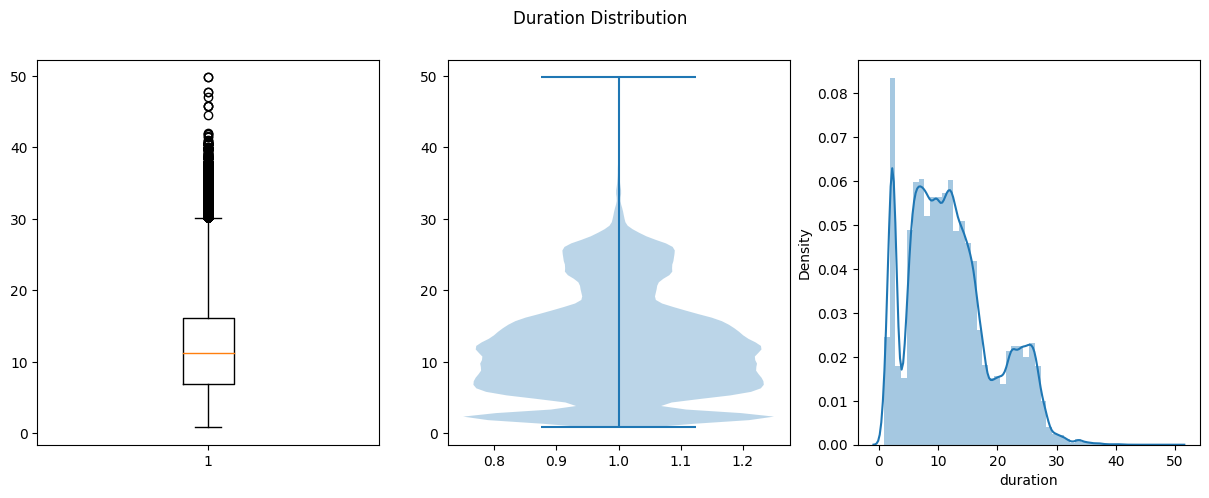

In [47]:
# let's see

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

fig.suptitle('Duration Distribution')

ax1.boxplot(df['duration'])
ax2.violinplot(df['duration'])
sns.distplot(df['duration']);

In [48]:
classes, counts = np.unique(df['class'], return_counts=True)

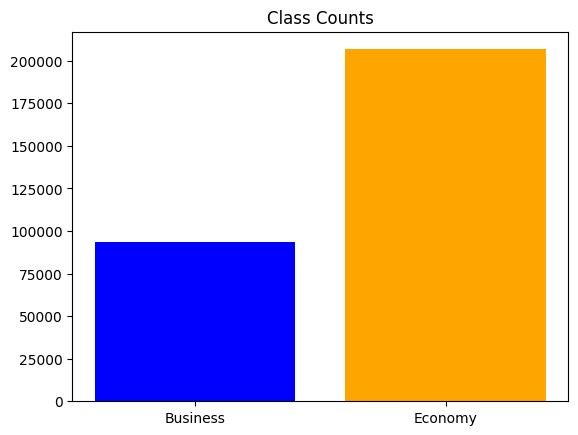

In [50]:
plt.title('Class Counts')
plt.bar(classes, counts, color=['blue', 'orange']);

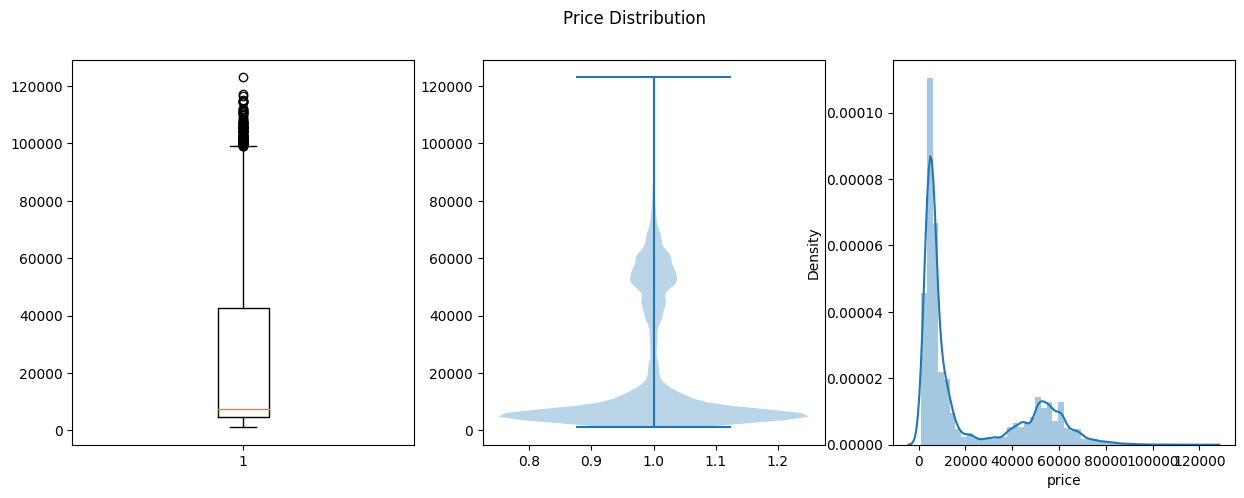

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

fig.suptitle('Price Distribution')

ax1.boxplot(df['price'])
ax2.violinplot(df['price'])
sns.distplot(df['price']);

## **Let's see heatmap**
Actually this dataset is good because all the features seem to be reasonable and highly correlated...

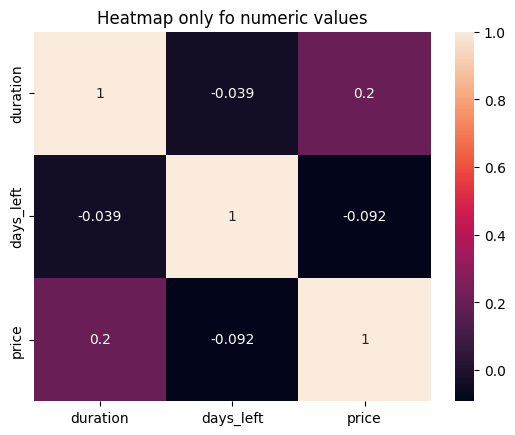

In [54]:
plt.title('Heatmap only fo numeric values')
sns.heatmap(df.corr(numeric_only=True), annot=True);

Okay... Some of my guesses were not that right<br>
but let's transform categorical features.<br>
I'll onehot encode them, so it will be more features now in our dataset.